
INTRODUCTION

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. According to the WHO, an estimated 17.9 million people died from heart disease in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Of all heart diseases, coronary heart disease (aka heart attack) is by far the most common and the most fatal. In the United States, for example, it is estimated that someone has a heart attack every 40 seconds and about 805,000 Americans have a heart attack every year (CDC 2019).

The silver lining is that heart attacks are highly preventable and simple lifestyle modifications(such as reducing alcohol and tobacco use; eating healthily and exercising) coupled with early treatment greatly improves its prognosis. It is, however, difficult to identify high risk patients because of the multi-factorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol, et cetera. This is where machine learning and data mining come to the rescue.

Doctors and scientists alike have turned to machine learning (ML) techniques to develop screening tools and this is because of their superiority in pattern recognition and classification as compared to other traditional statistical approaches.

In this project, I will be giving you a walk through on the development of a screening tool for predicting whether a patient has 10-year risk of developing coronary heart disease(CHD) using different Machine Learning technique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\Python\Codes\Alma Better Practice and Projects\Machine Learning\Cardiovascular Risk Prediction\Data\data_cardiovascular_risk.csv")

In [3]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


The dataset is from an ongoing cardiovascular studyon residents of the town of Framingham,Massachusetts. The classification goal is to predictwhether the patient has a 10-year risk offuture coronary heart disease (CHD). The dataset providesthe patients’ information. It includesover 4,000 records and 15 attributes.VariablesEach attribute is a potential risk factor. There are both demographic, behavioral, and medical riskfactors.


    Sex: male or female("M" or "F")
    Age: Age of the patient;(Continuous - Although therecorded ages have been truncated towhole numbers, the concept of age is continuous)Behavioral
    is_smoking: whether or not the patient is a currentsmoker ("YES" or "NO")
    Cigs Per Day: the number of cigarettes that theperson smoked on average in one day.(can beconsidered continuous as one can have any number ofcigarettes, even half a cigarette.)Medical( history)
    BP Meds: whether or not the patient was on bloodpressure medication (Nominal)
    Prevalent Stroke: whether or not the patient hadpreviously had a stroke (Nominal)
    Prevalent Hyp: whether or not the patient was hypertensive(Nominal)
    Diabetes: whether or not the patient had diabetes(Nominal)Medical(current)
    Tot Chol: total cholesterol level (Continuous)
    Sys BP: systolic blood pressure (Continuous)
    Dia BP: diastolic blood pressure (Continuous)
    BMI: Body Mass Index (Continuous)
    Heart Rate: heart rate (Continuous - In medicalresearch, variables such as heart rate though infact discrete, yet are considered continuous becauseof large number of possible values.)
    Glucose: glucose level (Continuous)Predict variable (desired target)
    10-year risk of coronary heart disease CHD(binary:“1”, means “Yes”, “0” means “No”) -DV


In [5]:
data.shape

(3390, 17)

In [7]:
data.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [17]:
data.isnull().sum()/data.shape[0]*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
Risk               0.000000
dtype: float64

In [11]:
data.value_counts('TenYearCHD')/data.shape[0]

TenYearCHD
0    0.849263
1    0.150737
dtype: float64

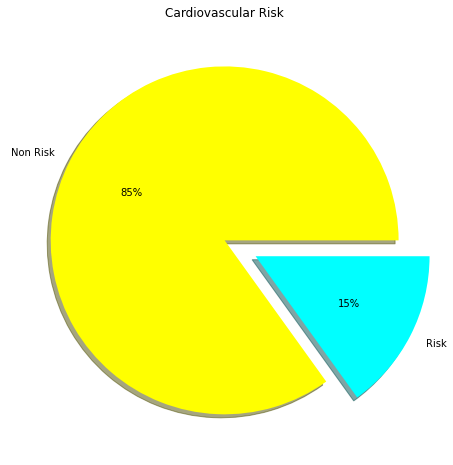

In [12]:
labels = 'Non Risk', 'Risk'
my_colors = ['yellow', 'cyan']
my_explode = (0,0.2)
plt.figure(figsize=(12,8))
plt.pie(data['TenYearCHD'].value_counts(), labels=labels, autopct='%1.0f%%',shadow=True, colors=my_colors, explode=my_explode)
plt.title('Cardiovascular Risk')
plt.show()

Here we see there is a huge class imbalance.

In [13]:
data.rename(columns={'TenYearCHD':'Risk'}, inplace=True)

In [14]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')

In [16]:
sns.countplot(data=data , x='education', hue='Risk')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


<AxesSubplot:xlabel='education', ylabel='count'>

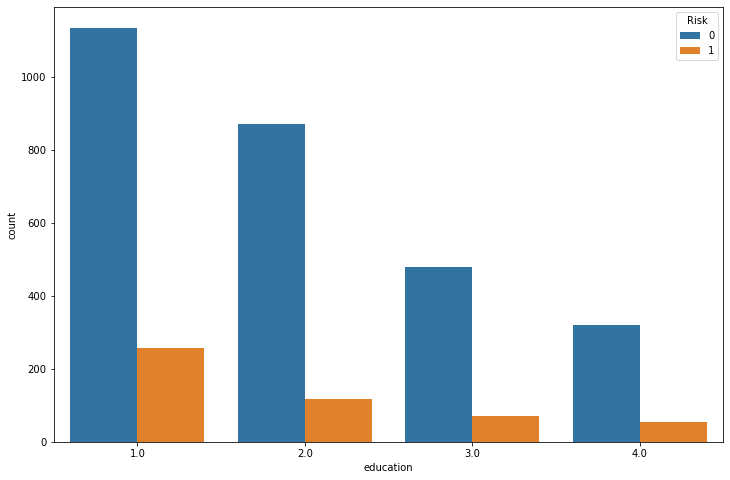

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(data=data , x='education', hue='Risk')

<AxesSubplot:xlabel='is_smoking', ylabel='count'>

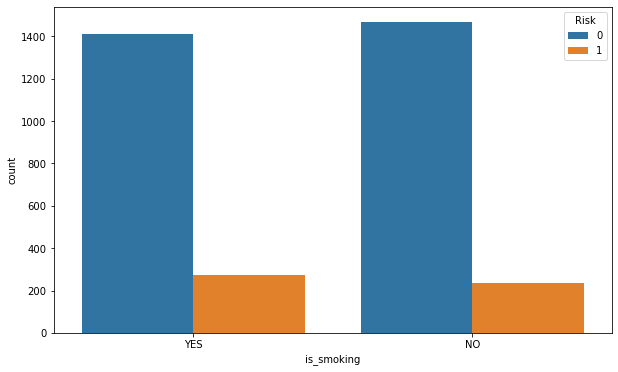

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='is_smoking', hue='Risk')

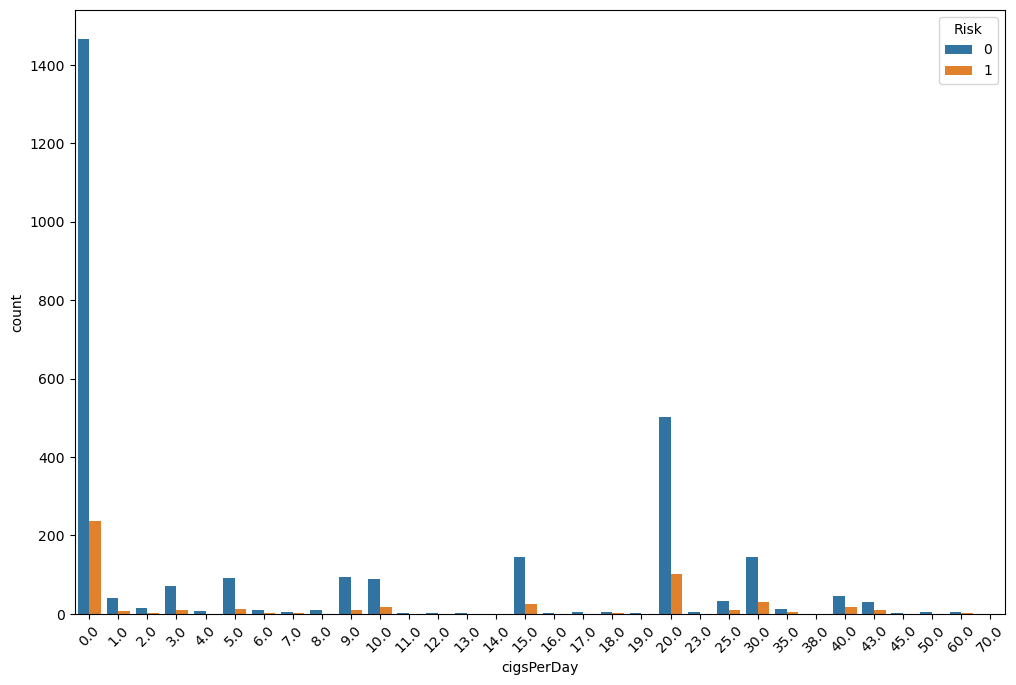

In [36]:
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=data , x='cigsPerDay', hue='Risk')
plt.xticks(rotation=45);

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

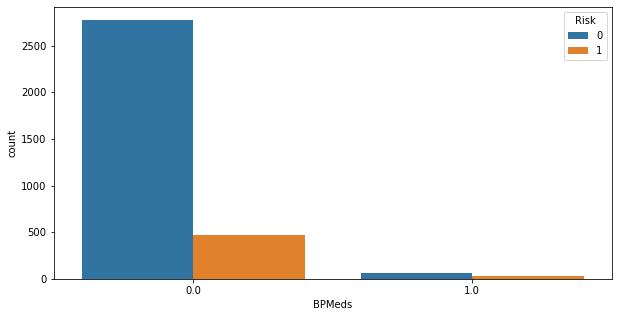

In [26]:
plt.figure(figsize=(10,5),)
sns.countplot(data=data , x='BPMeds', hue='Risk')

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

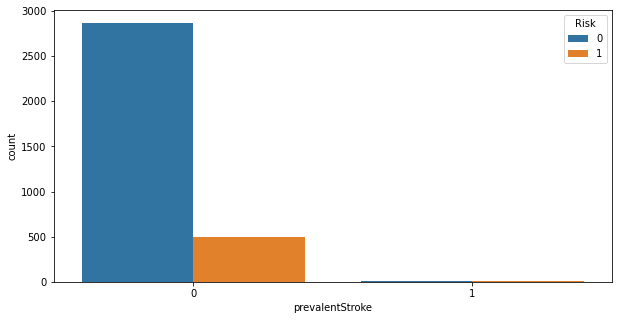

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='prevalentStroke', hue='Risk')

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

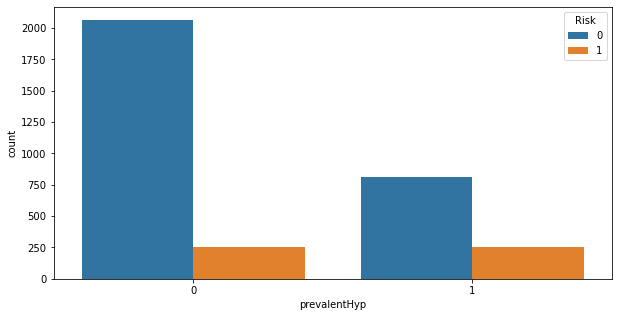

In [29]:
plt.figure(figsize=(10,5))
#PrevelentHype means whether the patient was hypertensive and their chances of happening CHD
sns.countplot(data=data, x='prevalentHyp', hue='Risk')

<AxesSubplot:xlabel='age', ylabel='count'>

<Figure size 720x360 with 0 Axes>

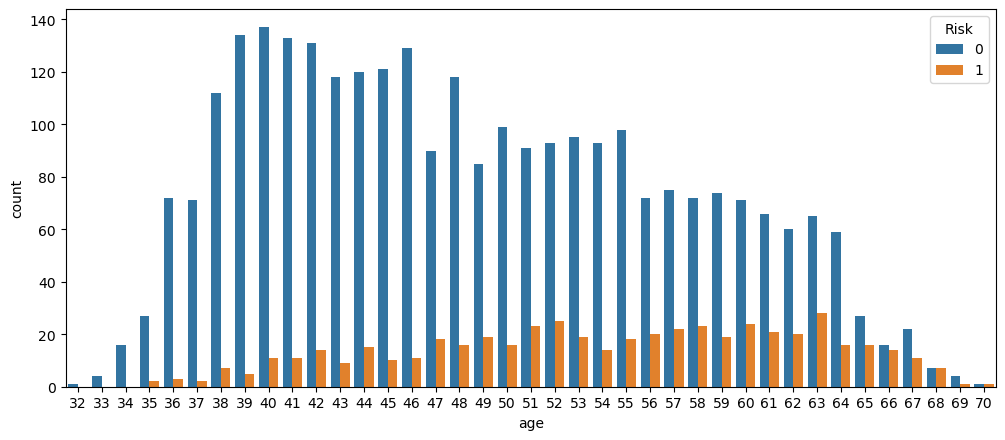

In [30]:
# Chances of CHD with respect to age 
plt.figure(figsize=(12,5), dpi=100)
sns.countplot(data=data, x='age', hue='Risk')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

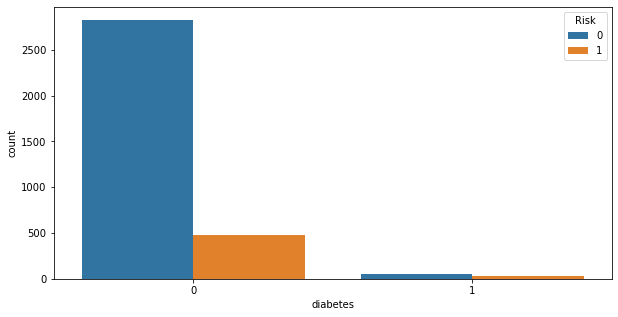

In [32]:
plt.figure(figsize=(10,5))
#Chances of CHD for a diabetic patient 
sns.countplot(data=data, x='diabetes', hue='Risk')

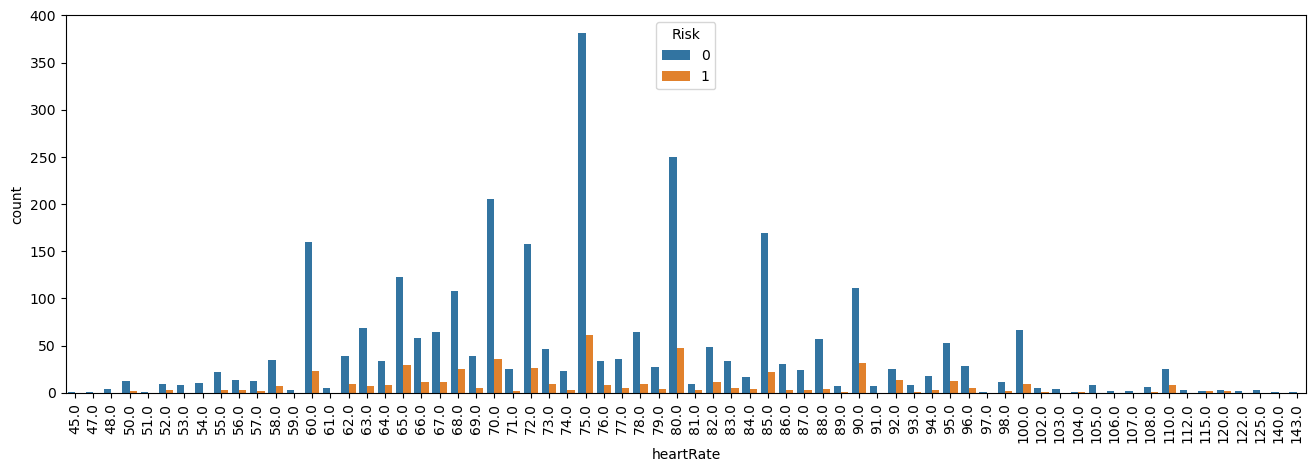

In [33]:
#CHD chances with respect to heartrate
plt.figure(figsize=(16,5), dpi=100)
sns.countplot(data=data, x='heartRate', hue='Risk')
plt.xticks(rotation=90);

In [37]:
data = data.drop('id', axis=1)